# Projekti 1 
### (Analiza e te dhenave/Regresi linear/shumefishte/logjik) 



1 - Eksplorimi i te dhenave:
- Lexoni te dhenat
- Paraqisni te dhenat ne menyre te permbledhur(kolonat, rreshtat, llojet e te dhenave)
- Pastroni te dhenat nga dopiot, te dhenat boshe, lloji i te dhenave
- Llogarisni disa statistika permbledhese.


In [391]:
import pandas as pd

# I lexojn te dhenat nga dataseti 
# ky dataset eshte marre nga kaggle.com (https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer)
df = pd.read_csv("Salary_Data.csv")

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Nga kjo informacion mund te shohim qe dataseti ka 2 kolona dhe 30 rreshta. Kolonat jane:
- YearsExperience
- Salary
- City
- Language
- Level

Duke pare te dhenat, mund te shohim qe kolonat 'City', 'Language' dhe 'Level' kane te dhena te tipit string, ndersa kolonat 'YearsExperience' dhe 'Salary' kane te dhena te tipit float.

Ne kete rast Salari eshte variabla e varur, ndersa YearsExperience (dhe Age) eshte variabla e pavarur.

In [393]:
def drop_outliers(df, column_name):
    percent = 1.5

    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - percent * iqr
    upper_bound = q3 + percent * iqr

    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

In [394]:
# Pastrimi i te dhenave

df = df.dropna()  # I heqim te gjitha rreshtat qe jane null
df = df.drop_duplicates()  # I heqim te gjitha rreshtat qe jane duplikate

# I heqim outlinerat
df = drop_outliers(df, 'Years of Experience')
df = drop_outliers(df, 'Salary')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


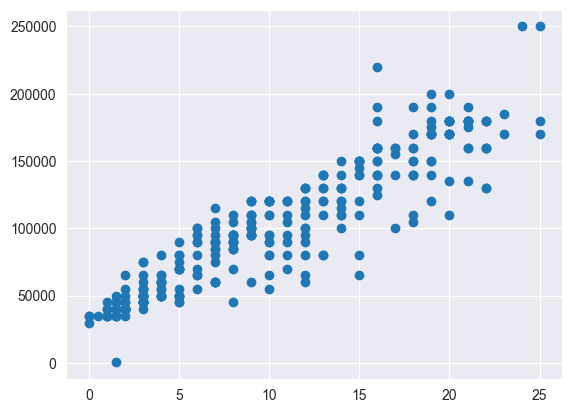

In [395]:
# I vizualizojme te dhenat e pastruara permes grafikeve
import matplotlib.pyplot as plt

# entry = ['Education Level', 'Job Title']
# 
# for col in entry:
#     df[col] = df[col].astype('category')
#     df[col] = df[col].cat.codes
# X = df.drop(columns=['Age', 'Gender', 'Salary'])
    
# Drop columns Salary and Gender Age 
X = df['Years of Experience']
y = df['Salary']

plt.scatter(X, y)

In [396]:
# Llogarisim disa statistika permbledhese
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


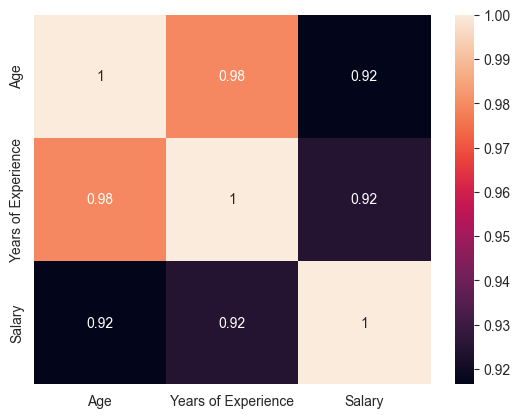

In [397]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)
plt.show()

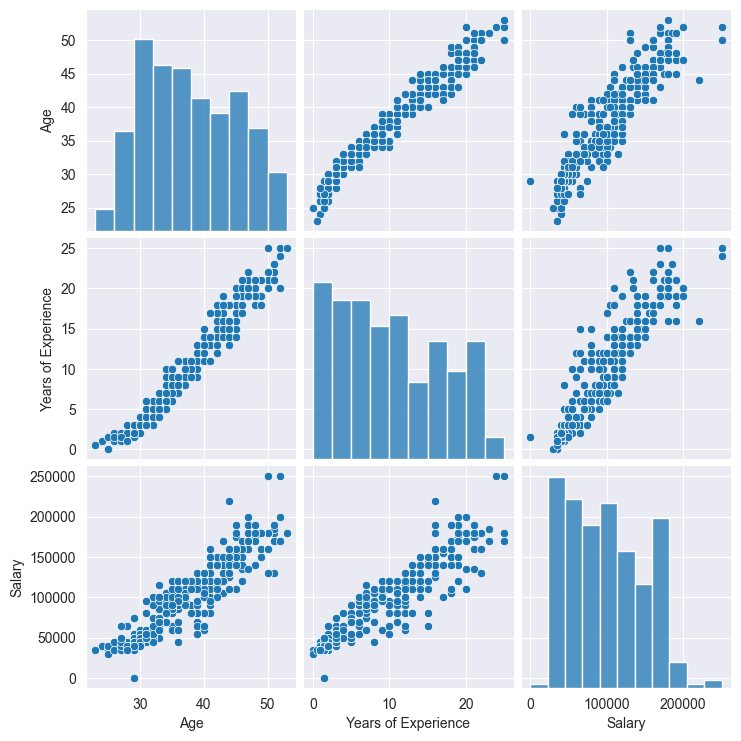

In [398]:
sns.pairplot(df)

In [ ]:
plt.scatter(X, y)
plt.show()

4- Analiza e korrelacionit/regresionit: 

-   Ndertoni nje model regresioni
-   Paraqitja grafike
-   Shpjegoni perfundimin


In [311]:
# Para krijimit te modelit duhet te ndajme te dhenat ne dy pjese: train (80%) dhe test (20%)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
# Krijimi i modelit
# Modeli jon do te jete nje model linear regresion
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

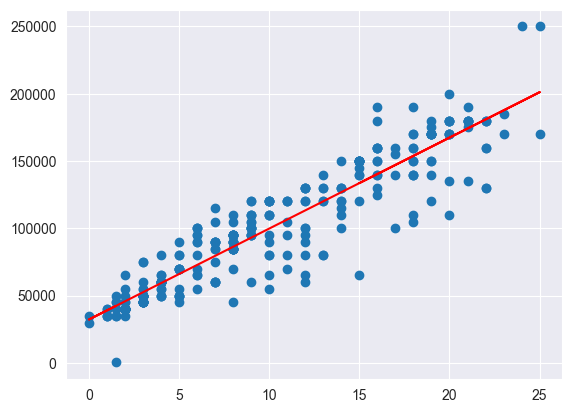

In [313]:
y_train_pred = linear_model.predict(x_train)  # e bejm parashikimin per te dhena te train set

plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, color='red')

In [314]:
def percent_of(value):
    print(f"({round(value, 4) * 100}%)")

In [315]:
percent_of(linear_model.score(x_train, y_train))  # b0 + b1 * x

(85.7%)


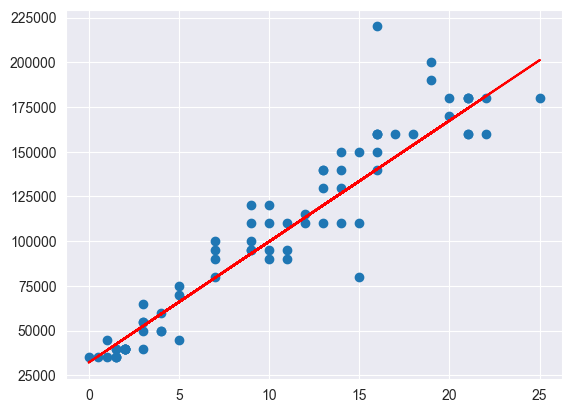

In [363]:
# Test data
y_test_pred = linear_model.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, color='red')

In [317]:
percent_of(linear_model.score(x_test, y_test))

(89.16%)
